In [41]:
import xml.etree.ElementTree as ET
import cv2

In [133]:
import PIL 
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
import re

In [57]:
def take_revers(img_path,num):
    xml_path = img_path[:-3]+'xml'
    tree = ET.parse(xml_path)
    root = tree.getroot()
    size = root.find('size')
    
    height = int(size.find('height').text)
    width = int(size.find('width').text)
    objects = root.findall('object')
    box_arr1 = []
    box_arr2 = []

    for obj in objects:
        box = obj.find('bndbox')
        box_arr1.append([int(box.find('xmin').text),
                         int(box.find('ymin').text),
         int(box.find('xmax').text),
         int(box.find('ymax').text)])
        width_arr = [box.find('xmin'),
         box.find('xmax')]
        height_arr = [box.find('ymin'),
         box.find('ymax')]

        for i in range(2):
            width_arr[i].text = str(width-int(width_arr[i].text))
        param = width_arr[0].text
        print(param)
        width_arr[0].text=width_arr[1].text
        print (param)
        width_arr[1].text = param
        box_arr2.append([int(box.find('xmin').text),
                         int(box.find('ymin').text),
         int(box.find('xmax').text),
         int(box.find('ymax').text)])
    
    p = re.search(r'\d+\.',img_path)
    root.find('filename').text = str(num+int(img_path[p.span()[0]:p.span()[1]-1]))+'.jpg'
    tree.write(img_path[:p.span()[0]]+str(num+int(img_path[p.span()[0]:p.span()[1]-1]))+'.xml')
    
    
    im = Image.open(img_path) #
    out = im.transpose(PIL.Image.FLIP_LEFT_RIGHT) 
    out.save(img_path[:p.span()[0]]+str(num+int(img_path[p.span()[0]:p.span()[1]-1]))+'.jpg')

In [72]:
path = '/home/ivan/university/maga/hakatons/dataset/размеченные/'
num=51
for i in range(47,num):
    img_path = path+str(i+1)+'.jpg'
    print (img_path)
    take_revers(img_path,num)

/home/ivan/university/maga/hakatons/dataset/размеченные/48.jpg


FileNotFoundError: [Errno 2] No such file or directory: '/home/ivan/university/maga/hakatons/dataset/размеченные/48.xml'

In [28]:
def draw_annotations(img, bboxes, thickness=2, color=(0,255,0)):
    annotations = img.copy()
    for box in bboxes:
        tlc = (box[0], box[1])
        brc = (box[2], box[3])
        cv2.rectangle(annotations, tlc, brc, color, thickness, cv2.LINE_AA)
     
    return annotations

## Загрузка батчей для VGG 16

In [48]:
import torch
from torch.utils.data import DataLoader

In [49]:
from torchvision.datasets import ImageFolder

In [54]:
from torchvision import transforms

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Resize(224),
        transforms.CenterCrop(224),
        
    ]
)

In [47]:
datasets = {
    'train': ImageFolder(
        root='/home/ivan/university/maga/hakatons/dataset/vgg_data/',
        transform=transform
    ),
}

#datasets['train'].class_to_idx

NameError: name 'ImageFolder' is not defined

In [20]:
batch_size = 32
num_workers = 4
dataloaders = {
    'train': DataLoader(
        datasets['train'], 
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers
    ),
}

## YOLO от Ultralitics

In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 125.1 kB/s eta 0:00:001m128.5 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 1.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.1
    Uninstalling numpy-1.26.1:
      Successfully uninstalled numpy-1.26.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.


Note: you may need to restart the kernel to use updated packages.


In [24]:
import torch

In [9]:
import matplotlib.pyplot as plt

#### Формирования лейблов yolo из xml

In [53]:
import os

In [60]:
folder_path = '/home/ivan/university/maga/hakatons/dataset/yolo_dataset/labels/train/'

In [62]:
files = os.listdir(path=folder_path)
class_dict = {'man_with_weapon':0,
              'man_without_weapon':1,
              'long_weapons':2,
              'short_weapons':2,
              'another':2
             }
for file in files:
    tree = ET.parse(folder_path+file)
    root = tree.getroot()
    size = root.find('size')
    
    height = int(size.find('height').text)
    width = int(size.find('width').text)
    objects = root.findall('object')
    with open(folder_path+file[:-3]+'txt','w') as out:
        for obj in objects:
            class_name = class_dict.get(obj.find('name').text,2)
            box = obj.find('bndbox')
            x = (float(box.find('xmin').text)+float(box.find('xmax').text))/2/width
            y = (float(box.find('ymin').text)+float(box.find('ymax').text))/2/height
            xw = (float(box.find('xmax').text)-float(box.find('xmin').text))/width
            yh = (float(box.find('ymax').text)-float(box.find('ymin').text))/height
            out.write(f'{class_name} {x} {y} {xw} {yh}\n')

#### Загрузка датасета

In [63]:
from ultralytics.data.dataset import YOLODataset

In [99]:
dataset = YOLODataset(data='/home/ivan/university/maga/hakatons/dataset/datasets/yolo_dataset.yaml')

TypeError: __init__() missing 1 required positional argument: 'img_path'

In [70]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5l')

Using cache found in /home/ivan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-10-29 Python-3.9.13 torch-2.0.1+cu117 CPU

Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients
Adding AutoShape... 


In [31]:
img = '/home/ivan/university/maga/hakatons/transpose-output.png'  # or file, Path, PIL, OpenCV, numpy, list
results = model2.predict(img)

plt.imshow(results[0].render()[0])



image 1/1 /home/ivan/university/maga/hakatons/transpose-output.png: 448x640 1 man_with_weapon, 2 weapons, 132.9ms
Speed: 22.1ms preprocess, 132.9ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


AttributeError: 'Results' object has no attribute 'render'. See valid attributes below.

    A class for storing and manipulating inference results.

    Args:
        orig_img (numpy.ndarray): The original image as a numpy array.
        path (str): The path to the image file.
        names (dict): A dictionary of class names.
        boxes (torch.tensor, optional): A 2D tensor of bounding box coordinates for each detection.
        masks (torch.tensor, optional): A 3D tensor of detection masks, where each mask is a binary image.
        probs (torch.tensor, optional): A 1D tensor of probabilities of each class for classification task.
        keypoints (List[List[float]], optional): A list of detected keypoints for each object.

    Attributes:
        orig_img (numpy.ndarray): The original image as a numpy array.
        orig_shape (tuple): The original image shape in (height, width) format.
        boxes (Boxes, optional): A Boxes object containing the detection bounding boxes.
        masks (Masks, optional): A Masks object containing the detection masks.
        probs (Probs, optional): A Probs object containing probabilities of each class for classification task.
        keypoints (Keypoints, optional): A Keypoints object containing detected keypoints for each object.
        speed (dict): A dictionary of preprocess, inference, and postprocess speeds in milliseconds per image.
        names (dict): A dictionary of class names.
        path (str): The path to the image file.
        _keys (tuple): A tuple of attribute names for non-empty attributes.
    

In [33]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'man_with_weapon', 1: 'man_without_weapon', 2: 'weapon'}
 orig_img: array([[[ 93, 117, 123],
         [ 93, 117, 123],
         [ 93, 117, 123],
         ...,
         [122, 129, 138],
         [123, 130, 139],
         [114, 121, 130]],
 
        [[ 93, 117, 123],
         [ 93, 117, 123],
         [ 93, 117, 123],
         ...,
         [ 79,  86,  95],
         [ 70,  77,  86],
         [ 56,  63,  72]],
 
        [[ 93, 117, 123],
         [ 93, 117, 123],
         [ 93, 117, 123],
         ...,
         [ 51,  58,  67],
         [ 43,  50,  59],
         [ 31,  38,  47]],
 
        ...,
 
        [[  3,   3,   3],
         [  3,   3,   3],
         [  3,   3,   3],
         ...,
         [129, 123, 124],
         [128, 122, 123],
         [127, 121, 122]],
 
        [[  3,   3,   3],
         [  3,   3,   3],
         [  3,   3,   

In [32]:
results.show()

AttributeError: 'list' object has no attribute 'show'

In [21]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
  

In [5]:
freeze = [f'model.{x}.' for x in range(22)]
freeze

['model.0.',
 'model.1.',
 'model.2.',
 'model.3.',
 'model.4.',
 'model.5.',
 'model.6.',
 'model.7.',
 'model.8.',
 'model.9.',
 'model.10.',
 'model.11.',
 'model.12.',
 'model.13.',
 'model.14.',
 'model.15.',
 'model.16.',
 'model.17.',
 'model.18.',
 'model.19.',
 'model.20.',
 'model.21.']

In [6]:
for k,v in model.named_parameters():
    v.requires_grad = True
    if any(x in k for x in freeze):
        print(f'freezing {k}')
        v.requires_grad = False

freezing model.model.0.conv.weight
freezing model.model.0.bn.weight
freezing model.model.0.bn.bias
freezing model.model.1.conv.weight
freezing model.model.1.bn.weight
freezing model.model.1.bn.bias
freezing model.model.2.cv1.conv.weight
freezing model.model.2.cv1.bn.weight
freezing model.model.2.cv1.bn.bias
freezing model.model.2.cv2.conv.weight
freezing model.model.2.cv2.bn.weight
freezing model.model.2.cv2.bn.bias
freezing model.model.2.m.0.cv1.conv.weight
freezing model.model.2.m.0.cv1.bn.weight
freezing model.model.2.m.0.cv1.bn.bias
freezing model.model.2.m.0.cv2.conv.weight
freezing model.model.2.m.0.cv2.bn.weight
freezing model.model.2.m.0.cv2.bn.bias
freezing model.model.3.conv.weight
freezing model.model.3.bn.weight
freezing model.model.3.bn.bias
freezing model.model.4.cv1.conv.weight
freezing model.model.4.cv1.bn.weight
freezing model.model.4.cv1.bn.bias
freezing model.model.4.cv2.conv.weight
freezing model.model.4.cv2.bn.weight
freezing model.model.4.cv2.bn.bias
freezing mode

In [108]:
params_to_update = model.parameters()

print("Params to learn:")
params_to_update = []
for name,param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)

optimizer = torch.optim.Adam(params_to_update, lr=0.0001)
criterion = torch.nn.CrossEntropyLoss()

Params to learn:


In [45]:
import time
import copy

from tqdm import tqdm

def train_model(model, dataloaders, criterion, optimizer, num_epochs=10):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'valid':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [39]:
model, val_acc_history = train_model(model, dataloaders, criterion, optimizer, num_epochs=10)

SyntaxError: invalid syntax (329998999.py, line 1)

In [74]:
model.train(data='/home/ivan/university/maga/hakatons/dataset/yolo_dataset/yolo_dataset.yaml')

TypeError: train() got an unexpected keyword argument 'data'

In [3]:
from ultralytics import YOLO

In [100]:
model = YOLO("yolov8n.yaml")


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [4]:
model = YOLO("yolov8n.pt")

In [103]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [91]:
for k,v in model.named_parameters():
    v.requires_grad = True
    if any(x in k for x in freeze):
        print(f'freezing {k}')
        v.requires_grad = False

freezing model.model.0.conv.weight
freezing model.model.0.bn.weight
freezing model.model.0.bn.bias
freezing model.model.1.conv.weight
freezing model.model.1.bn.weight
freezing model.model.1.bn.bias
freezing model.model.2.cv1.conv.weight
freezing model.model.2.cv1.bn.weight
freezing model.model.2.cv1.bn.bias
freezing model.model.2.cv2.conv.weight
freezing model.model.2.cv2.bn.weight
freezing model.model.2.cv2.bn.bias
freezing model.model.2.cv3.conv.weight
freezing model.model.2.cv3.bn.weight
freezing model.model.2.cv3.bn.bias
freezing model.model.2.m.0.cv1.conv.weight
freezing model.model.2.m.0.cv1.bn.weight
freezing model.model.2.m.0.cv1.bn.bias
freezing model.model.2.m.0.cv2.conv.weight
freezing model.model.2.m.0.cv2.bn.weight
freezing model.model.2.m.0.cv2.bn.bias
freezing model.model.3.conv.weight
freezing model.model.3.bn.weight
freezing model.model.3.bn.bias
freezing model.model.4.cv1.conv.weight
freezing model.model.4.cv1.bn.weight
freezing model.model.4.cv1.bn.bias
freezing mode

In [92]:
params_to_update = model.parameters()

print("Params to learn:")
params_to_update = []
for name,param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)

optimizer = torch.optim.Adam(params_to_update, lr=0.0001)
criterion = torch.nn.CrossEntropyLoss()

Params to learn:


In [17]:
model.train(data='/home/ivan/university/maga/hakatons/dataset/datasets/yolo_dataset.yaml',epochs=20)

Ultralytics YOLOv8.0.202 🚀 Python-3.9.13 torch-2.0.1+cu117 CPU (AMD Ryzen 3 4300U with Radeon Graphics)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/ivan/university/maga/hakatons/dataset/datasets/yolo_dataset.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train142, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      10/20         0G      1.548      1.919       1.76         22        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         10         34      0.667      0.231      0.392      0.202
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      11/20         0G      1.518      2.375       1.77          8        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         10         34       0.78      0.375      0.519      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      12/20         0G      1.361      2.203       1.68          9        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         10         34      0.514      0.324      0

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f76f969cc10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [1]:
__file__

NameError: name '__file__' is not defined

In [2]:
!pwd

/home/ivan/university/maga/hakatons/guns_searcher


In [25]:
torch.save(model,'yolo.pth')

TypeError: cannot pickle 'torch._C.Generator' object

In [26]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [64]:
model2 = YOLO('/home/ivan/university/maga/hakatons/guns_searcher/best.pt')

In [65]:
results = model2(['/home/ivan/university/maga/hakatons/transpose-output.png'])  # return a list of Results objects

# Process results list



0: 448x640 1 man_with_weapon, 2 weapons, 76.5ms
Speed: 8.4ms preprocess, 76.5ms inference, 4.1ms postprocess per image at shape (1, 3, 448, 640)


In [102]:
boxes.xyxy[2]

tensor([1220.0852,  461.9590, 1613.8401,  650.6675])

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'rec'. Expected sequence length 4, got 2
>  - Can't parse 'rec'. Expected sequence length 4, got 2


In [125]:
img = Image.open('/home/ivan/university/maga/hakatons/transpose-output.png')

In [46]:
result.plot()

array([[[ 93, 117, 123],
        [ 93, 117, 123],
        [ 93, 117, 123],
        ...,
        [122, 129, 138],
        [123, 130, 139],
        [114, 121, 130]],

       [[ 93, 117, 123],
        [ 93, 117, 123],
        [ 93, 117, 123],
        ...,
        [ 79,  86,  95],
        [ 70,  77,  86],
        [ 56,  63,  72]],

       [[ 93, 117, 123],
        [ 93, 117, 123],
        [ 93, 117, 123],
        ...,
        [ 51,  58,  67],
        [ 43,  50,  59],
        [ 31,  38,  47]],

       ...,

       [[  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3],
        ...,
        [129, 123, 124],
        [128, 122, 123],
        [127, 121, 122]],

       [[  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3],
        ...,
        [129, 123, 124],
        [128, 122, 123],
        [127, 121, 122]],

       [[  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3],
        ...,
        [127, 121, 122],
        [125, 119, 120],
        [124, 118, 119]]

ValueError: not enough values to unpack (expected 4, got 3)

In [70]:
import torchvision


In [128]:
from torchvision import transforms

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Resize(224),
        transforms.CenterCrop(224),
        
    ]
)

In [129]:
dict_class = {0:'another',1:'long_weapons',2:'short_weapons'}

In [141]:
for r in results:
    img = Image.fromarray(r.orig_img[..., ::-1])
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])
    drow = ImageDraw.Draw(im)
      # RGB PIL image
    for bord in r.boxes:
        if bord.cls == 'weapon' or bord.cls == 2:
            
            data = transform(img.crop((
                             bord.xyxy[0][0].item(),
                             bord.xyxy[0][1].item(),
                             bord.xyxy[0][2].item(),
                             bord.xyxy[0][3].item()
                           )))
            data = torch.reshape(data,(1,*data.shape))
            result = model_vgg(data)
            label = str(dict_class[torch.max(result.data,1).indices.item()])
            print(label)
            drow.text((100,100),
                label,
                fill=('#1C0606')
                )
    
    
    im.show()# show image
    im.save('results.jpg')  # save image
    

/home/ivan/anaconda3/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


short_weapons
short_weapons


In [106]:
bord.xyxy

tensor([[1220.0852,  461.9590, 1613.8401,  650.6675]])

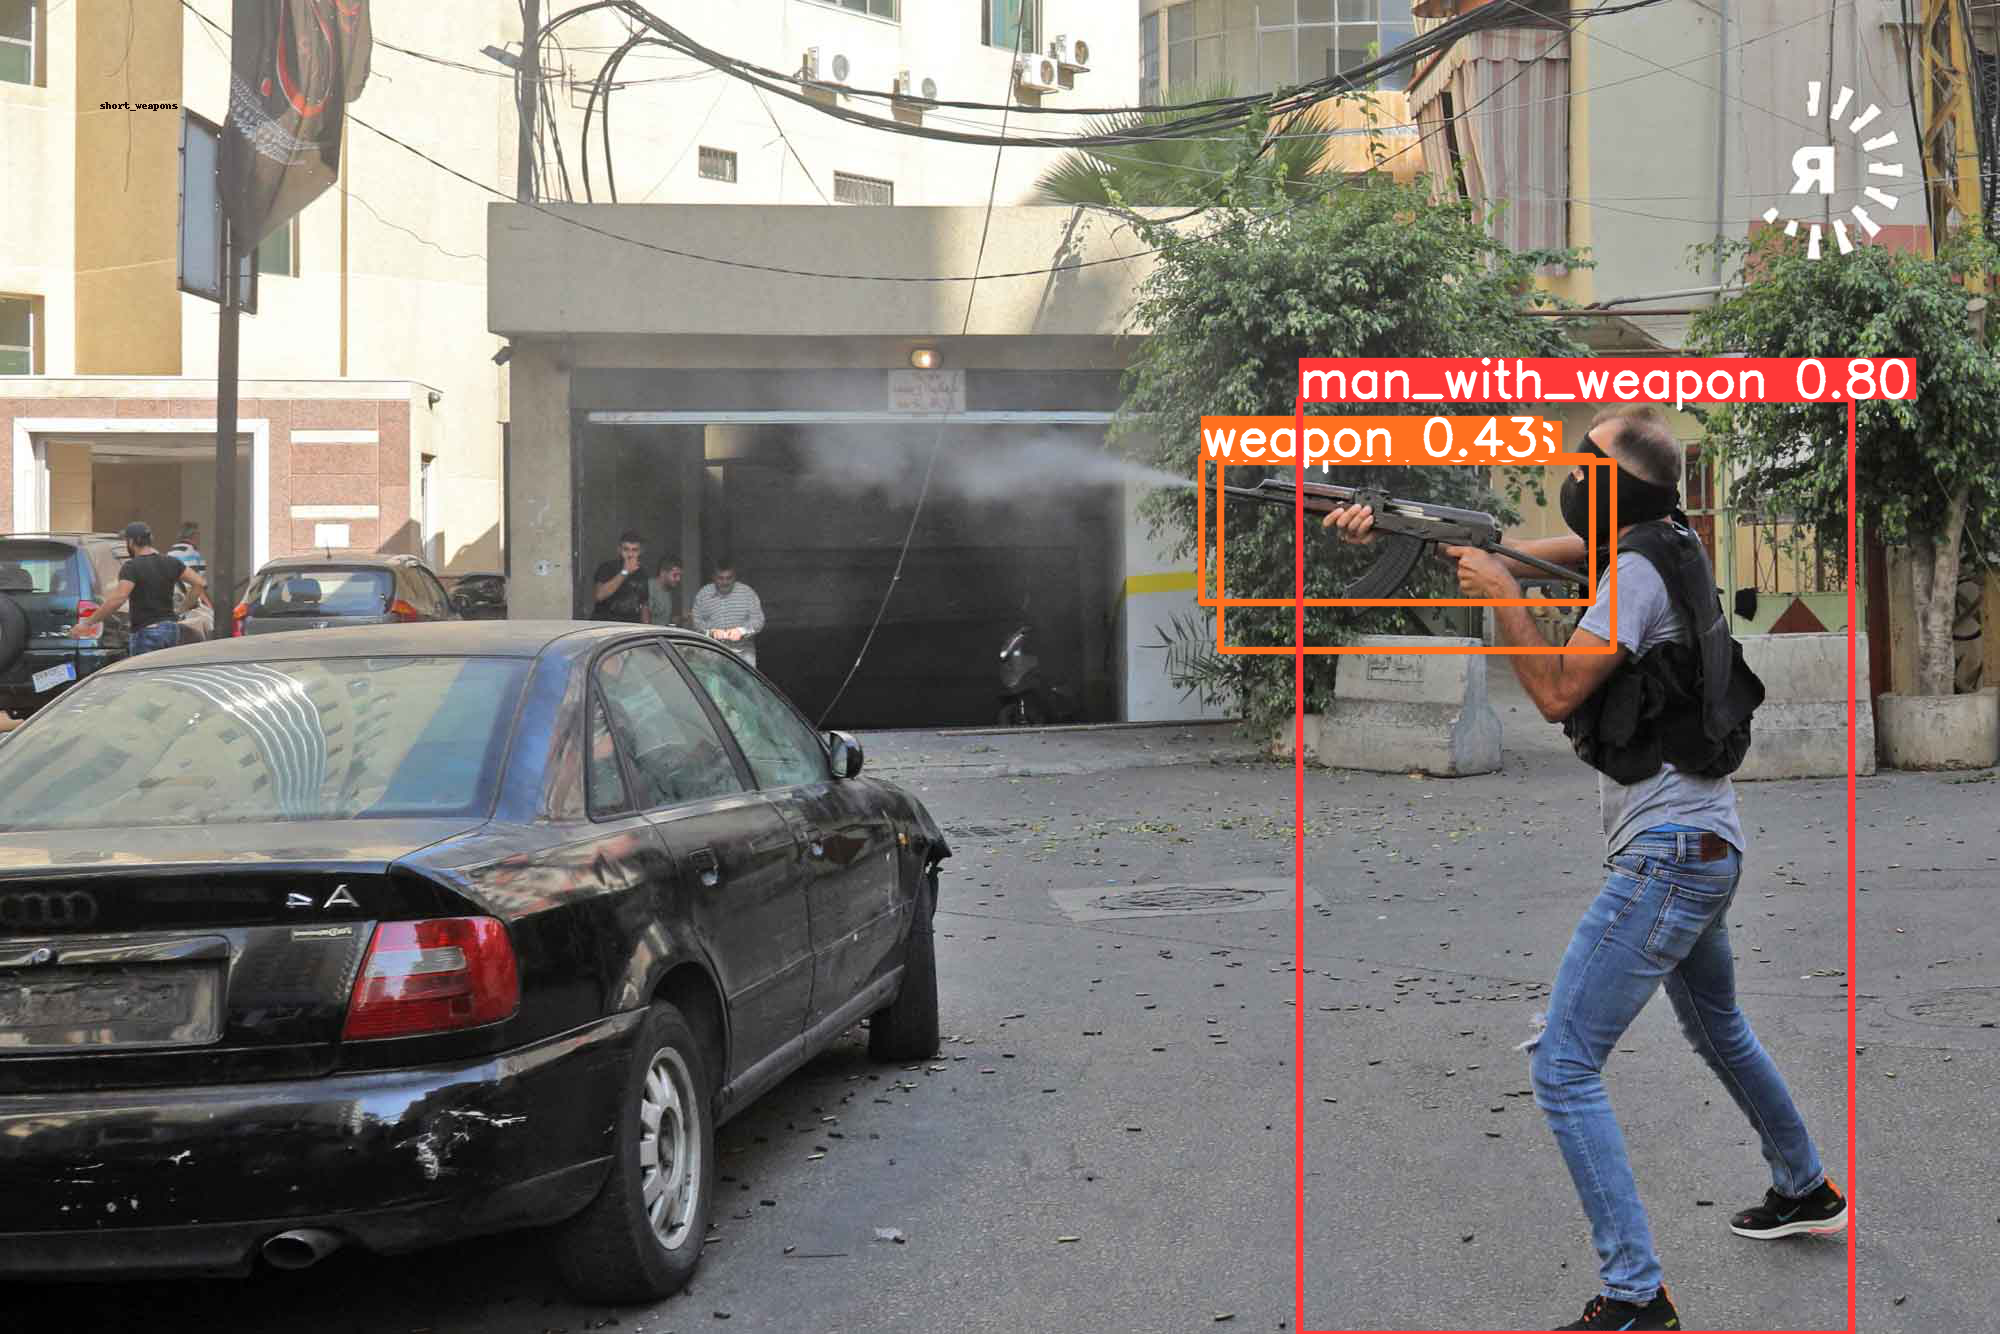

In [142]:
im

In [120]:
bord.xyxy[0].to_list()

AttributeError: 'Tensor' object has no attribute 'to_list'

In [122]:
print(
                             bord.xyxy[0][0].item(),
                             bord.xyxy[0][1].item(),
                             bord.xyxy[0][2].item(),
                             bord.xyxy[0][3].item()
)                     

1220.085205078125 461.958984375 1613.840087890625 650.66748046875


In [123]:
img = img.crop((1220.0852,  461.9590, 1613.8401,  650.6675))

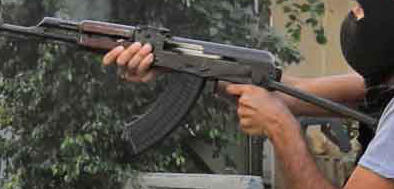

In [126]:
img.crop((
                             bord.xyxy[0][0].item(),
                             bord.xyxy[0][1].item(),
                             bord.xyxy[0][2].item(),
                             bord.xyxy[0][3].item()
                           ))

In [51]:
model_vgg = torch.load('/home/ivan/university/maga/hakatons/guns_searcher/model.pth')

In [57]:
img = Image.open("/home/ivan/university/maga/hakatons/dataset/vgg_data/long_weapons/00001029.jpg")
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Resize(224),
        transforms.CenterCrop(224),
        
    ]
)
data = transform(img)

/home/ivan/anaconda3/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [58]:
result = model_vgg(data)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (512x49 and 25088x4096)

In [60]:
data.shape

torch.Size([3, 224, 224])

In [61]:
model_vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
f = open('example.csv','w')
f.write('filename;weapon;classes\n')
path = '/home/ivan/university/maga/hakatons/test_images_ready/'
files = os.listdir(path=path)



for i in files:
    results = model2([path+i])  # return a list of Results objects

# Process results list

    dict_class = {0:'another',1:'long_weapons',2:'short_weapons'}
    classes = []
    detection = False
    for r in results:
        img = Image.fromarray(r.orig_img[..., ::-1])
        im_array = r.plot()  # plot a BGR numpy array of predictions
        im = Image.fromarray(im_array[..., ::-1])
        drow = ImageDraw.Draw(im)
          # RGB PIL image
        for bord in r.boxes:
            if bord.cls == 'weapon' or bord.cls == 2:
                   
                data = transform(img.crop((
                                 bord.xyxy[0][0].item(),
                                 bord.xyxy[0][1].item(),
                                 bord.xyxy[0][2].item(),
                                 bord.xyxy[0][3].item()
                               )))
                data = torch.reshape(data,(1,*data.shape))
                result = model_vgg(data)
                classes.append(str(dict_class[torch.max(result.data,1).indices.item()]))
                print(label)
                


        im.show()# show image
        im.save('results.jpg')  # save image

        detection = True
        classes=['short_weapons']
        f.write(f'{i};{detection};{classes}\n')

f.close()
